In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# import glass.csv file in current working directory
Glass = pd.read_csv("glass.csv")
Glass

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [3]:
#Original data set size
Glass.shape

(214, 11)

In [4]:
# Checking data types
Glass.dtypes

ID         int64
RI       float64
NA2O     float64
MGO      float64
AL2O3    float64
SIO2     float64
K2O      float64
CAO      float64
BAO      float64
FE2O3    float64
TYPE       int64
dtype: object

In [5]:
# Converting the target variable to category data type
Glass['TYPE'] = Glass.TYPE.astype('category')
Glass.dtypes

ID          int64
RI        float64
NA2O      float64
MGO       float64
AL2O3     float64
SIO2      float64
K2O       float64
CAO       float64
BAO       float64
FE2O3     float64
TYPE     category
dtype: object

In [6]:
# Dropping ID column as its not relevant to building model
Glass = Glass.drop(labels = ["ID"], axis = 1)
Glass

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [7]:
# Post ID drop
Glass.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
#Get sample data set of 10
Glass_sample_ds = Glass.sample(10)
Glass_sample_ds.shape

(10, 10)

In [9]:
# Printing 10 randomn rows
Glass_sample_ds

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.0,0.10,2
126,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.0,0.00,2
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.0,0.06,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
13,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.0,0.17,1
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.0,0.09,2
164,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.0,0.00,5
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.0,0.00,1


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [10]:
Glass.isnull().sum()

RI       0
NA2O     0
MGO      0
AL2O3    0
SIO2     0
K2O      0
CAO      0
BAO      0
FE2O3    0
TYPE     0
dtype: int64

In [11]:
# No missing values

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [12]:
import seaborn as sns

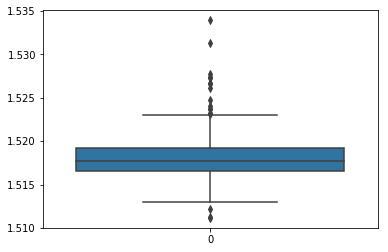

In [13]:
# Box plot for RI
plot = sns.boxplot(data = Glass["RI"]);
plot.set_xticklabels(plot.get_xticklabels());

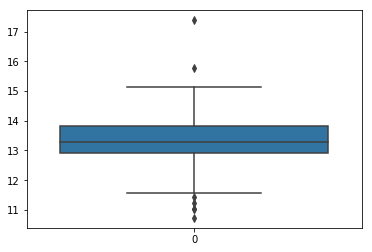

In [14]:
# Box plot for NA2O
plot = sns.boxplot(data = Glass["NA2O"]);
plot.set_xticklabels(plot.get_xticklabels());

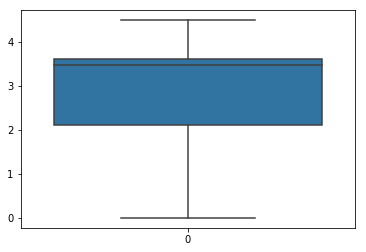

In [15]:
# Box plot for MGO
plot = sns.boxplot(data = Glass["MGO"]);
plot.set_xticklabels(plot.get_xticklabels());

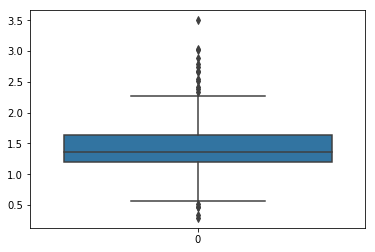

In [16]:
# Box plot for AL2O3
plot = sns.boxplot(data = Glass["AL2O3"]);
plot.set_xticklabels(plot.get_xticklabels());

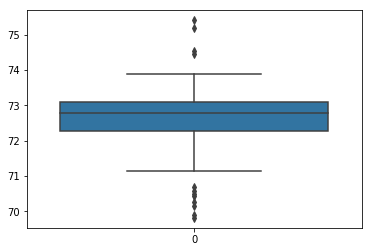

In [17]:
# Box plot for SIO2
plot = sns.boxplot(data = Glass["SIO2"]);
plot.set_xticklabels(plot.get_xticklabels());

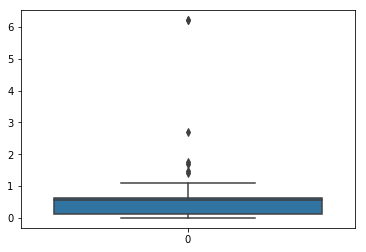

In [18]:
# Box plot for K2O
plot = sns.boxplot(data = Glass["K2O"]);
plot.set_xticklabels(plot.get_xticklabels());

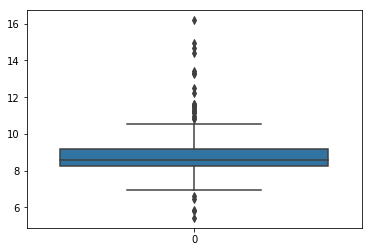

In [19]:
# Box plot for CAO
plot = sns.boxplot(data = Glass["CAO"]);
plot.set_xticklabels(plot.get_xticklabels());

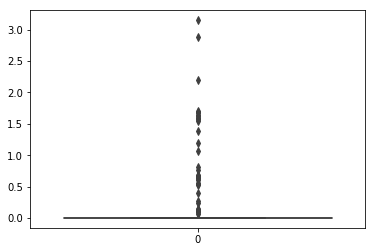

In [20]:
# Box plot for BAO
plot = sns.boxplot(data = Glass["BAO"]);
plot.set_xticklabels(plot.get_xticklabels());

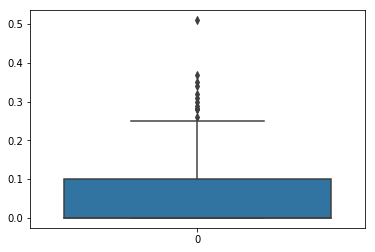

In [21]:
# Box plot for FE2O3
plot = sns.boxplot(data = Glass["FE2O3"]);
plot.set_xticklabels(plot.get_xticklabels());

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [22]:
# Check variance of each independent variable
Glass.apply("var")

RI       0.000009
NA2O     0.666841
MGO      2.080540
AL2O3    0.249270
SIO2     0.599921
K2O      0.425354
CAO      2.025366
BAO      0.247227
FE2O3    0.009494
TYPE     4.425716
dtype: float64

In [23]:
# Drop variables with variance <0.1
Glass = Glass.drop(labels = ["RI","FE2O3"], axis = 1)
Glass

,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,TYPE
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
5,12.79,3.61,1.62,72.97,0.64,8.07,0.00,1
6,13.30,3.60,1.14,73.09,0.58,8.17,0.00,1
7,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
8,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
9,13.00,3.60,1.36,72.99,0.57,8.40,0.00,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

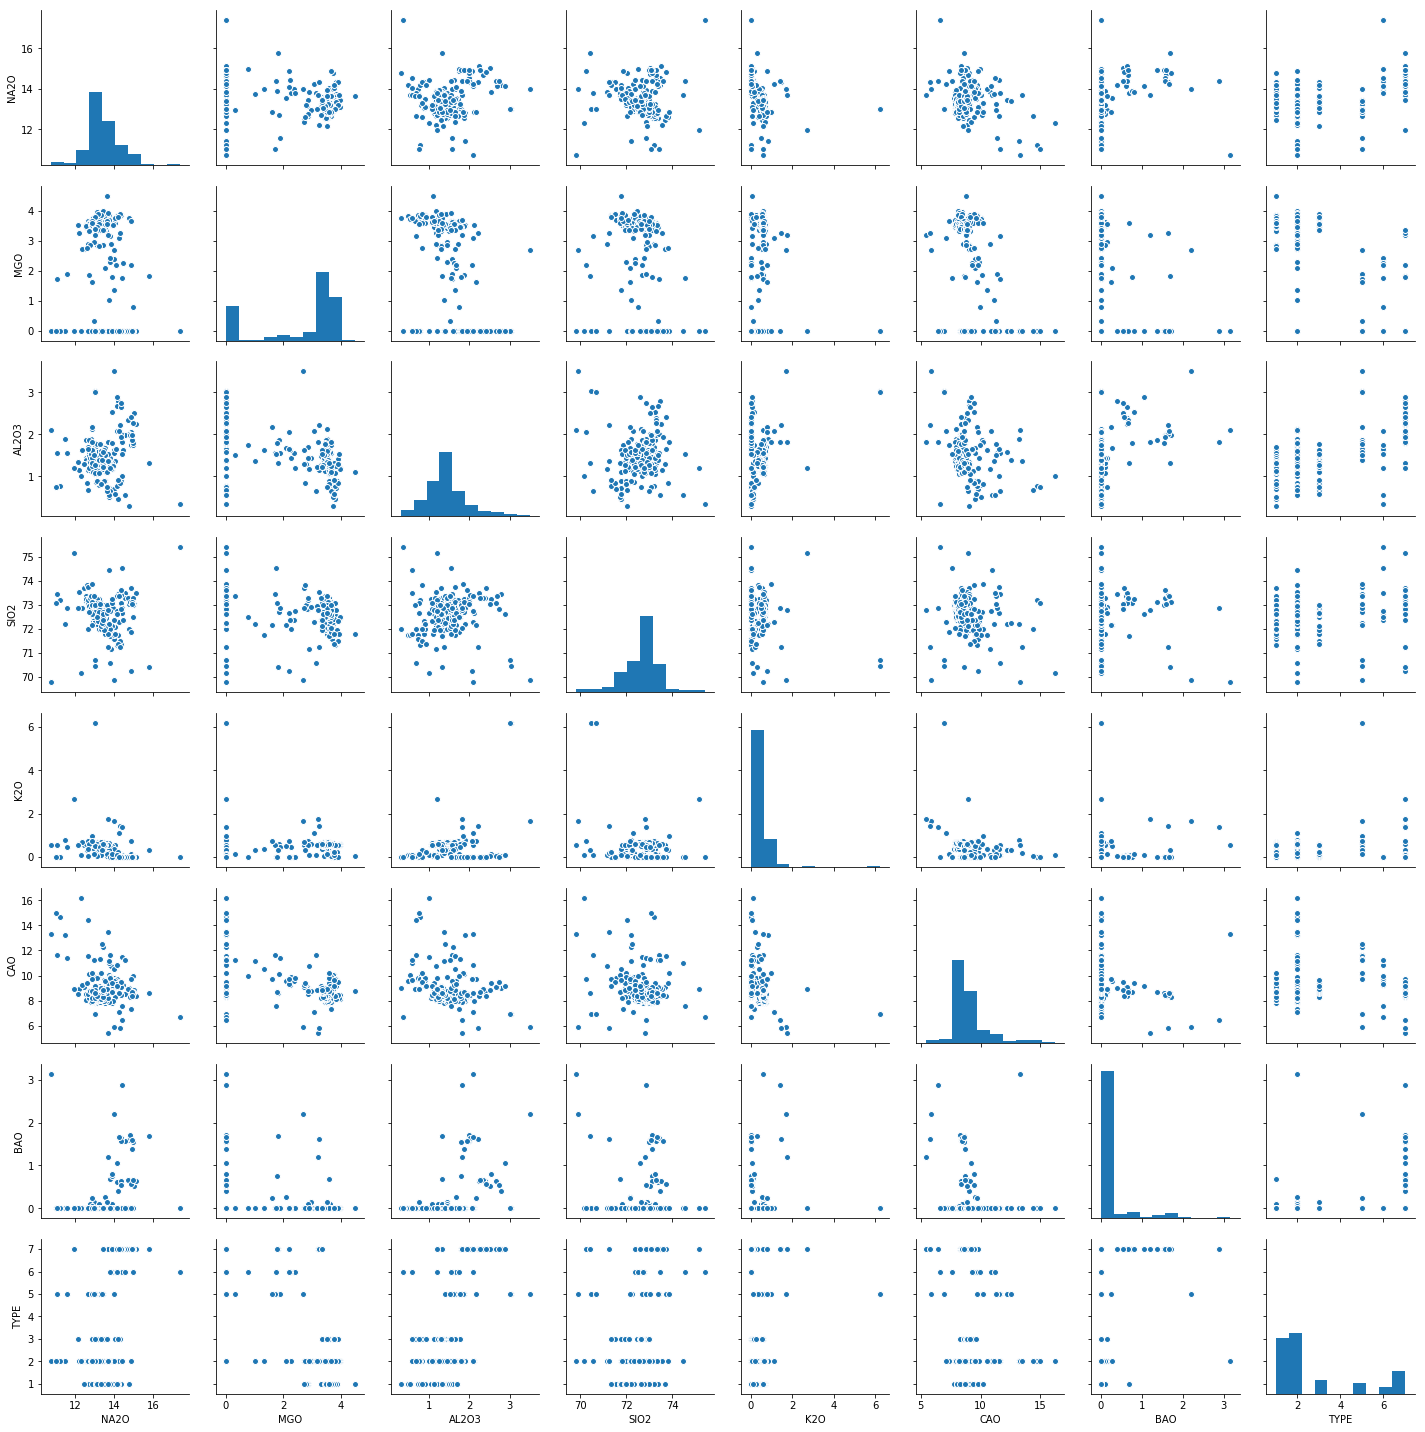

In [24]:
# Plot scatter matrix
sns.pairplot(Glass)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [25]:
# Create a separate dataframe consisting only of the features i.e independent attributes
Glass_feature = Glass.drop(labels= "TYPE" , axis = 1)
Glass_feature.head()

,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [26]:
# import all relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [27]:
# Set K=3
NNH = KNeighborsClassifier(n_neighbors= 3)

In [28]:
# convert all attributes to Z scale
Glass_feature_z = Glass_feature.apply(zscore)   
Glass_feature_z.describe()

,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [29]:
# Capture the class values from the 'TYPE' column into a pandas series akin to array 
Glass_labels = Glass["TYPE"]

In [30]:
# store the normalized features data into np array 
X = np.array(Glass_feature_z)
X.shape

(214, 7)

In [31]:
# store the bc_labels data into a separate np array
Y = np.array(Glass_labels)
Y.shape

(214,)

In [32]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [33]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

NNH.score(X_test, Y_test)

0.7692307692307693

In [35]:
# K = 3 gives accuracy of 76.92%

In [36]:
# Set K = 6
NNH = KNeighborsClassifier(n_neighbors= 6)

# convert all attributes to Z scale
Glass_feature_z = Glass_feature.apply(zscore)   
Glass_feature_z.describe()

# Capture the class values from the 'TYPE' column into a pandas series akin to array 
Glass_labels = Glass["TYPE"]

# store the normalized features data into np array 
X = np.array(Glass_feature_z)
X.shape

# store the bc_labels data into a separate np array
Y = np.array(Glass_labels)
Y.shape

# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Call Nearest Neighbour algorithm
NNH.fit(X_train, Y_train)

# For every test data point, predict it's label based on 6 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

NNH.score(X_test, Y_test)

0.7076923076923077

In [37]:
# K = 6 gives accuracy of 70.76%

In [38]:
#Set K = 9
NNH = KNeighborsClassifier(n_neighbors= 9)

# convert all attributes to Z scale
Glass_feature_z = Glass_feature.apply(zscore)   
Glass_feature_z.describe()

# Capture the class values from the 'TYPE' column into a pandas series akin to array 
Glass_labels = Glass["TYPE"]

# store the normalized features data into np array 
X = np.array(Glass_feature_z)
X.shape

# store the bc_labels data into a separate np array
Y = np.array(Glass_labels)
Y.shape

# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Call Nearest Neighbour algorithm
NNH.fit(X_train, Y_train)

# For every test data point, predict it's label based on 6 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

NNH.score(X_test, Y_test)

0.7076923076923077

In [39]:
# K = 9 gives accuracy of 70.76%

In [40]:
# Answer: K=3 gives the best accuracy

## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,20))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


In [ ]:
# Answer: K=1 is optimal based on Misclassification error

## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

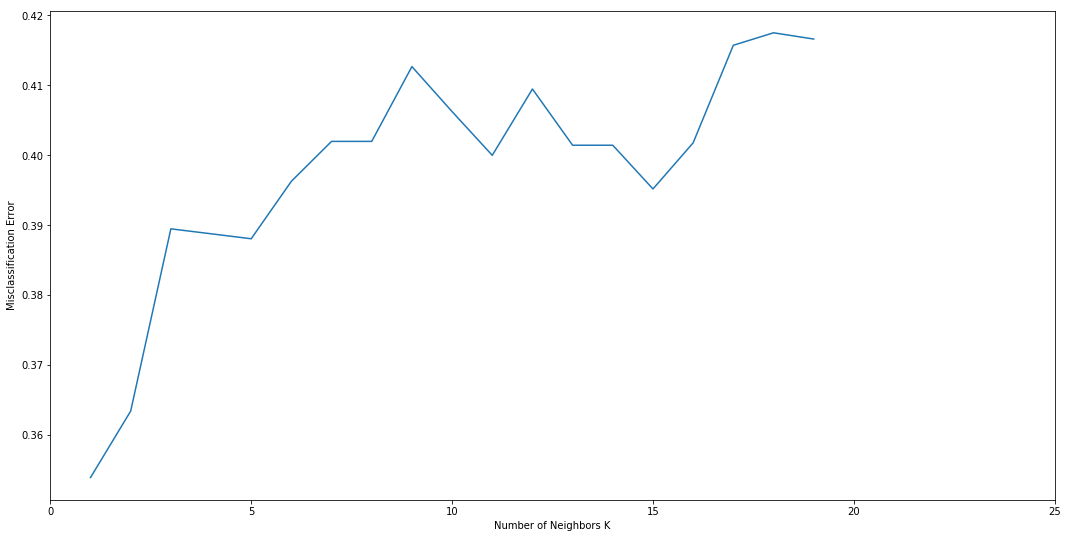

In [42]:
# Plotting misclassification error vs K
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
